<a href="https://colab.research.google.com/github/Snig2415/ML_Zoomcamp_2025/blob/main/Lecture08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upgrade pip and install necessary packages
!pip install --upgrade pip
!pip install tensorflow pandas matplotlib seaborn scikit-learn

In [2]:
# Clone the clothing dataset
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 14.47 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
# Verify dataset structure
!ls clothing-dataset-small/train
!ls clothing-dataset-small/train/t-shirt | head

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt
00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg
00805d0e-7fe5-4251-b577-86065e4f6587.jpg
00d9cc6e-2564-4813-9d68-4bc4d562107b.jpg
0144d8a2-0d3b-4bee-b137-324129e746a8.jpg
01ace8a7-7621-478e-af83-cd4fac4cb157.jpg
01d1fed7-996d-496b-b3ae-73ab724f29cc.jpg
0285f2a0-ff21-43de-9762-6454faa5eef8.jpg
02ef828a-a7d5-4475-bf44-3907b3a977ff.jpg
03103065-f445-44a5-b707-53b73534f57d.jpg
0373fc11-3fca-4b92-8ae5-e208d53135a0.jpg


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [10]:
# Path to a sample image
image_path = "clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_name = os.path.join(image_path, name)

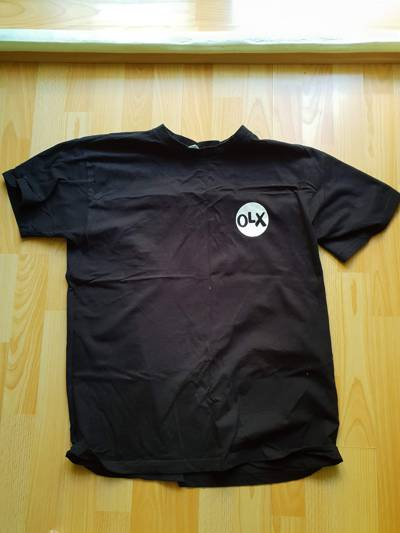

In [15]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [11]:
# Check if file exists
if os.path.exists(full_name):
    print("File found:", full_name)
else:
    print("File NOT found. Run !find to locate it.")

File found: clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg


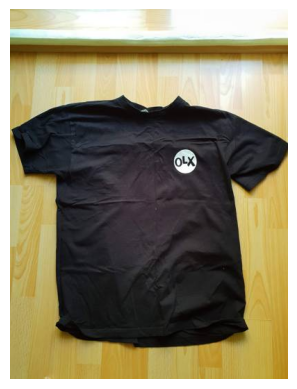

In [12]:
# Load and display image
img = load_img(full_name)
plt.imshow(img)
plt.axis("off")
plt.show()

Explore the dataset

In [13]:
# List categories
categories = os.listdir("clothing-dataset-small/train")
print("Categories:", categories)

Categories: ['shirt', 'hat', 't-shirt', 'longsleeve', 'dress', 'shoes', 'shorts', 'outwear', 'skirt', 'pants']


In [16]:
img = load_img(fullname, target_size=(299, 299))

In [17]:
# turn image into numpy array
x = np.array(img)
x.shape

(299, 299, 3)

8.3 Pre-trained convolutional neural networks

In [18]:
# Imagenet dataset: https://www.image-net.org/
# Pre-trained models: https://keras.io/api/applications/

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import  decode_predictions

In [20]:
model =  Xception(weights='imagenet',input_shape= (299,299,3))


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
# Use this model now to classify the image of the t-shirt above
# This model does not expect a single image, but a couple of images

X= np.array([x])
X.shape

(1, 299, 299, 3)

In [23]:
# Before applying the model we need to do some preprocessing
X= preprocess_input(X)

In [24]:
pred= model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step


(1, 1000)

In [25]:
# The output contains the probabilty of the image of being in a specific class
# In total there are 1000 classes
# In order to understand the output, we need to know which are the classes
# For that we use the decode_predictions function, which gives the best results
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', np.float32(0.68196356)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139977)),
  ('n04370456', 'sweatshirt', np.float32(0.034324735)),
  ('n03710637', 'maillot', np.float32(0.011354207)),
  ('n04525038', 'velvet', np.float32(0.0018453562))]]

In [ ]:
# Imagenet does not have a class "t-shirt"
# To predict the clothing classes we have, we need a different model for that
# We can use the Xceptions model and adjust it for our purpose
# We don't have to train it from scratch

# 8.4 Convolutional neural networks
Types of layers: convolutional and dense
Convolutional layers and filters
Dense layers

In [ ]:
# Mainly consists of convolutional and dense layers
# A convolutional layer consists of filters (of simple shapes) and it is calculated how similar the pixels are to this filter.
# These filters produce feature maps, which go to the next layer
# In each layer the neural net can learn more complicated features
# After passing the image through the convolutional filters, we get a vector representation of the image
# This vector representation is passed through a set of dense layers, which then give the prediction
# The prediction is given as a propability
# Depending on the problem, the last layer could be a
# Sigmoid layer for binary classification
# a Softmax layer for multiple classification
# REcommended website: https://cs231n.github.io

# 8.5 Transfer learning
Reading data with ImageDataGenerator  
Train Xception on smaller images (150x150)

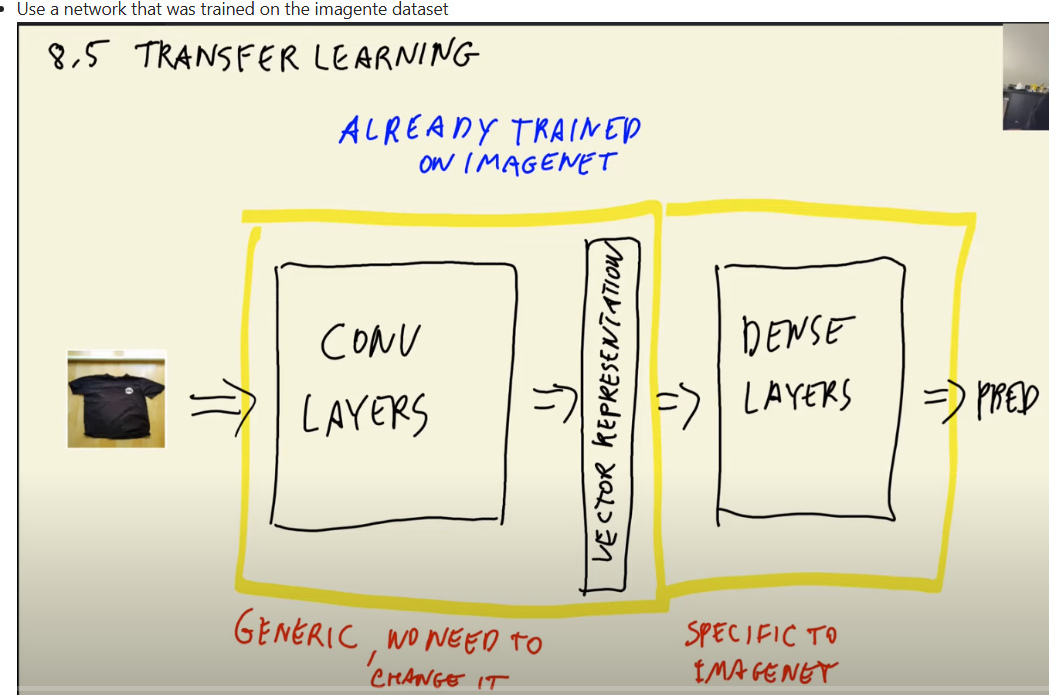

In [26]:
# We will use the convolutional part of the network that converts the image into a vector representation.
# Read the data using ImageDataGenerator
# Train Xception on smaller images (150 x 150)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_gen= ImageDataGenerator(preprocessing_function=preprocess_input)

# read images from directory
train_ds=  train_gen.flow_from_directory ('clothing-dataset-small/train',
                                         target_size=(150, 150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [30]:
# The input data size in (32, 150, 150, 3) [(batch_size, width, height, channels)]
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [33]:
# look at one image and target
# Each time you ask the generator(train_ds) for data, it returns the next batch of images and labels.
X,y= next(train_ds)

In [34]:
X.shape

(32, 150, 150, 3)

In [35]:
y.shape

(32, 10)

In [36]:
y[:5]  # multiclasss classification

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
# the same for the validation dataset

val_gen= ImageDataGenerator(preprocessing_function=preprocess_input)
# read images from directory
val_ds=  val_gen.flow_from_directory ('clothing-dataset-small/validation',
                                         target_size=(150, 150),
                                         batch_size=32)

Found 341 images belonging to 10 classes.


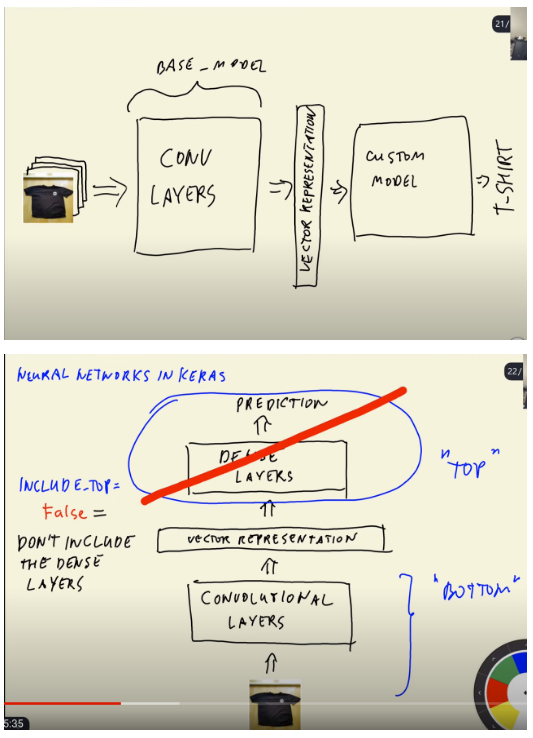

In [39]:
# Create the base model
base_model= Xception(include_top=False, weights='imagenet', input_shape=(150,150,3))
base_model.trainable= False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [41]:
from tensorflow import keras
from tensorflow.keras import layers,models

In [42]:
# Create a new top
inputs= keras.Input(shape=(150,150,3))
base= base_model(inputs)

outputs= base
model= keras.Model(inputs, outputs)

In [43]:
pred= model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


(32, 5, 5, 2048)

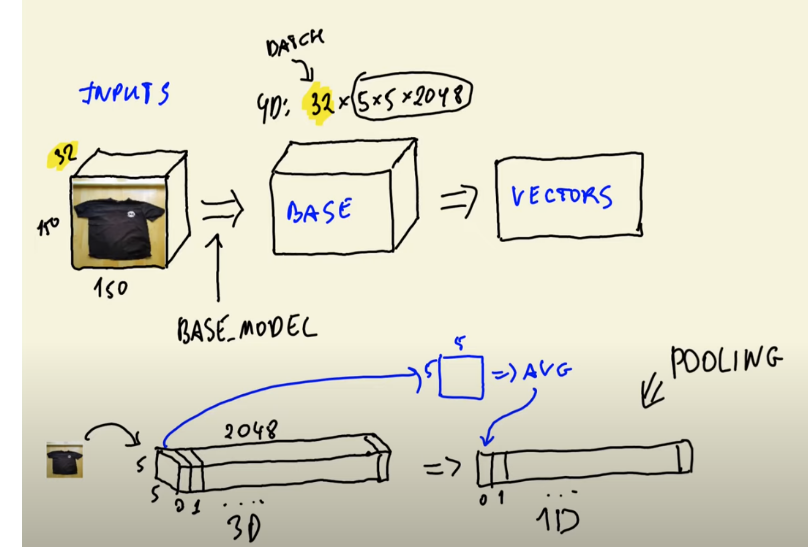

In [45]:
# Turn this output into a vector
inputs= keras.Input(shape=(150,150,3))
base= base_model(inputs)
pooling= keras.layers.GlobalAveragePooling2D()
vectors= pooling(base)
outputs= vectors
model= keras.Model(inputs, outputs)

In [46]:
pred= model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(32, 2048)

In [48]:
# Add the output layer
inputs= keras.Input(shape=(150,150,3))
base= base_model(inputs,training= False)
pooling= keras.layers.GlobalAveragePooling2D()
vectors= pooling(base)
outputs= keras.layers.Dense(10)(vectors)
model= keras.Model(inputs, outputs)

In [49]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [50]:
preds.shape

(32, 10)

In [51]:
# This model still has to be trained
#Loss function: measures how far the model’s predictions are from the true labels.
#CategoricalCrossentropy is used for multi-class classification (like t-shirt, pants, jacket).
#from_logits=True means the model outputs raw scores (not probabilities yet), and the loss function will handle converting them to probabilities internally

learning_rate= 0.01
optimizer= keras.optimizers.Adam(learning_rate= learning_rate)
loss= keras.losses.CategoricalCrossentropy(from_logits= True)
model.compile(optimizer= optimizer, loss= loss, metrics= ['accuracy'])

In [52]:
# train_ds: the training dataset generator
# val_ds: the validation dataset generator (to check performance on unseen data)
# epochs=10: go through the whole training dataset 10 times
# history: stores training info like loss and accuracy for each epoch
history= model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 372ms/step - accuracy: 0.5811 - loss: 1.6028 - val_accuracy: 0.7918 - val_loss: 0.7775
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8276 - loss: 0.5583 - val_accuracy: 0.7625 - val_loss: 0.8226
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8747 - loss: 0.3389 - val_accuracy: 0.7889 - val_loss: 0.8915
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9129 - loss: 0.2662 - val_accuracy: 0.7801 - val_loss: 1.0330
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9365 - loss: 0.1765 - val_accuracy: 0.7889 - val_loss: 0.9090
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9455 - loss: 0.1464 - val_accuracy: 0.7889 - val_loss: 1.0180
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9635 - loss: 0.1055 - val_accuracy: 0.7977 - val_loss: 1.0048
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9771 - loss: 0.0712 - val_accuracy: 0.8270 - val_loss:

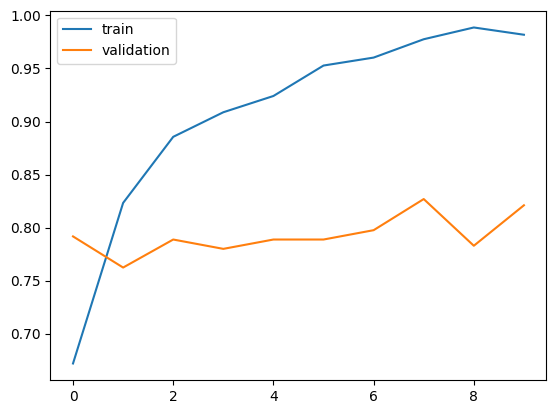

In [55]:
# history.history is a dictionary that contains:
# {
#   'loss': [...],            # training loss for each epoch
#   'accuracy': [...],        # training accuracy for each epoch
#   'val_loss': [...],        # validation loss for each epoch
#   'val_accuracy': [...]     # validation accuracy for each epoch
# }

plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.legend();


# 8.6 Adjusting the learning rate
What's the learning rate
Trying different values

In [56]:
# Too high learning rate may lead to overfitting
#(If training accuracy keeps going up but validation accuracy stops improving → overfitting.),
# too low learning rate may take very long

def make_model(learning_rate=.1):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

    base_model.trainable = False

    ##############################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ##############################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [57]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - accuracy: 0.1888 - loss: 2.2773 - val_accuracy: 0.4545 - val_loss: 1.6983
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.5018 - loss: 1.5359 - val_accuracy: 0.5924 - val_loss: 1.3215
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.6311 - loss: 1.1803 - val_accuracy: 0.6452 - val_loss: 1.1248
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6681 - loss: 1.0504 - val_accuracy: 0.6774 - val_loss: 1.0036
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7173 - loss: 0.9347 - val_accuracy: 0.7009 - val_loss: 0.9201
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7321 - loss: 0.8510 - val_accuracy: 0.7185 - val_loss: 0.8618
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7225 - loss: 0.8223 - val_accuracy: 0.7243 - val_loss: 0.8201
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.7548 - loss: 0.7518 - val_accuracy: 0

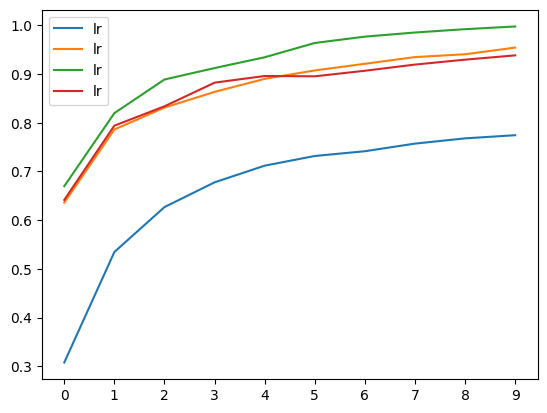

In [58]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label="lr")
    plt.xticks(np.arange(10))
plt.legend();

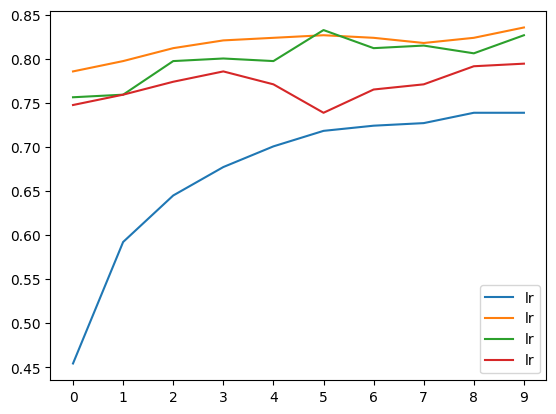

In [59]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label="lr")
    plt.xticks(np.arange(10))
plt.legend();

In [ ]:
# Choose the learning_rate=0.001

# 8.7 Checkpointing
Saving the best model only
Training a model with callbacks

In [60]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                               save_best_only=True,
                               monitor='val_accuracy',
                               mode='max')

In [ ]:
# make_model is a function that:
# Builds the neural network architecture.
# Compiles the model using the given learning_rate and an optimizer like Adam;returns a ready-to-train Keras model.
#checkpoint is usually a ModelCheckpoint callback:
# It saves the model whenever validation accuracy improves.

In [61]:
learning_rate = 0.001

model = make_model(learning_rate)
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4932 - loss: 1.5573

96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.4945 - loss: 1.5530 - val_accuracy: 0.7918 - val_loss: 0.7207
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7793 - loss: 0.6683

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.7794 - loss: 0.6680 - val_accuracy: 0.7947 - val_loss: 0.6502
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8242 - loss: 0.5166

96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8242 - loss: 0.5165 - val_accuracy: 0.8006 - val_loss: 0.5854
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8610 - loss: 0.4472

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8611 - loss: 0.4471 - val_accuracy: 0.8065 - val_loss: 0.5628
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8907 - loss: 0.3727

96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8906 - loss: 0.3727 - val_accuracy: 0.8328 - val_loss: 0.5491
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9148 - loss: 0.3111 - val_accuracy: 0.8270 - val_loss: 0.5396
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9258 - loss: 0.2824 - val_accuracy: 0.8065 - val_loss: 0.5387
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9410 - loss: 0.2501 - val_accuracy: 0.8211 - val_loss: 0.5265
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9499 - loss: 0.2305 - val_accuracy: 0.8240 - val_loss: 0.5340
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9546 - loss: 0.2072 - val_accuracy: 0.8182 - val_loss: 0.5292


# 8.8 Adding more layers
Adding one inner dense layer  
Experimenting with different sizes of inner layer

In [ ]:
# Add another dense layer, this needs an activation function. Here we use ReLU activation

In [62]:
def make_model(learning_rate=.1, size_inner=100):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

    base_model.trainable = False

    ##############################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    ##############################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [63]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 209ms/step - accuracy: 0.2745 - loss: 2.0206 - val_accuracy: 0.6510 - val_loss: 1.1839
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.6897 - loss: 1.0476 - val_accuracy: 0.7478 - val_loss: 0.8028
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7932 - loss: 0.6696 - val_accuracy: 0.7683 - val_loss: 0.7124
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8141 - loss: 0.5637 - val_accuracy: 0.7889 - val_loss: 0.6770
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.8501 - loss: 0.4796 - val_accuracy: 0.8006 - val_loss: 0.6490
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8773 - loss: 0.3965 - val_accuracy: 0.7801 - val_loss: 0.6423
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8930 - loss: 0.3630 - val_accuracy: 0.7859 - val_loss: 0.6385
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9021 - loss: 0.3365 - val_accuracy: 0.777

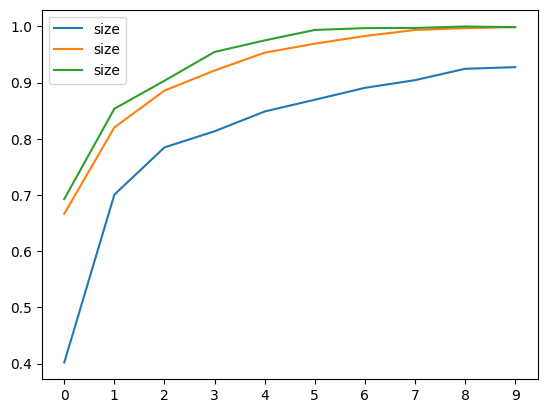

In [64]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label="size")
    plt.xticks(np.arange(10))
plt.legend();

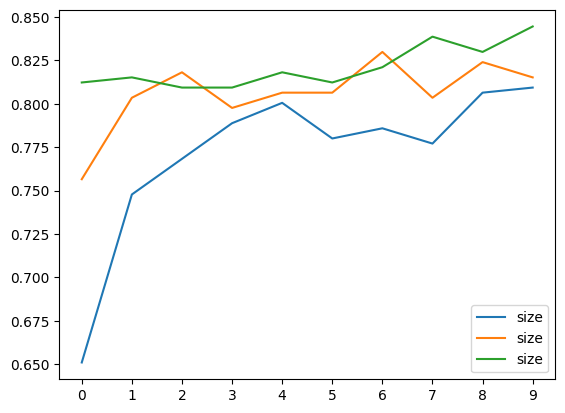

In [65]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label="size")
    plt.xticks(np.arange(10))
plt.legend();

# 8.9 Regularization and dropout
Regularizing by freezing a part of the network  
Adding dropout to our model  
Experimenting with different values  

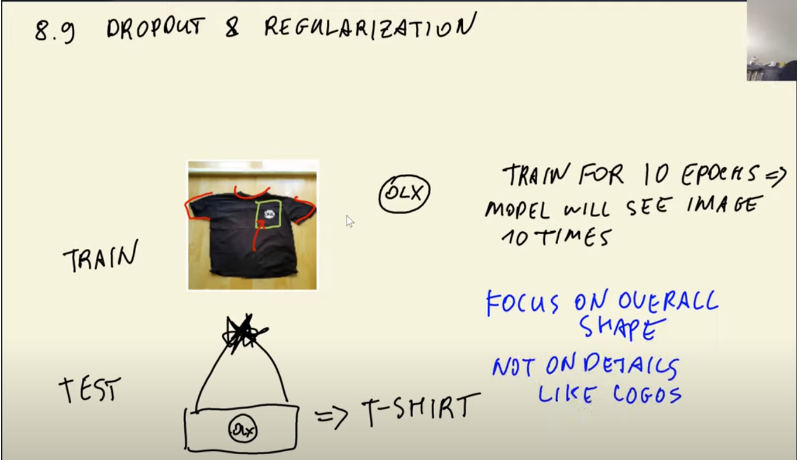

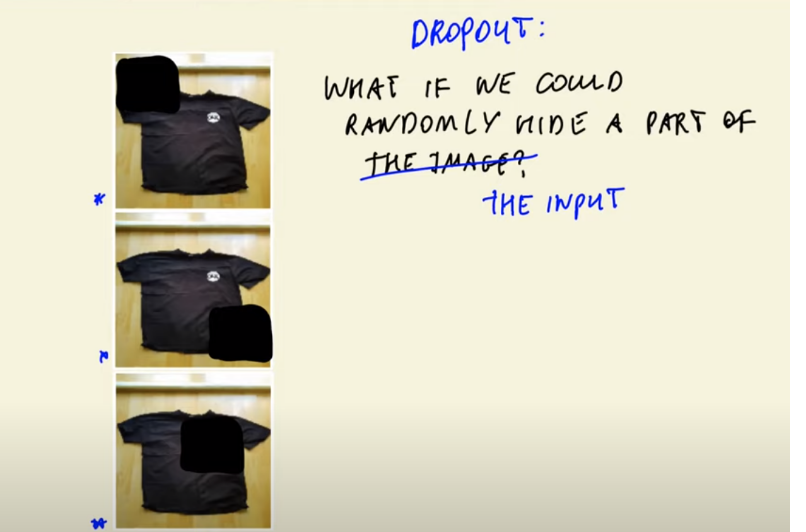

In [66]:
def make_model(learning_rate=.1, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

    base_model.trainable = False

    ##############################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

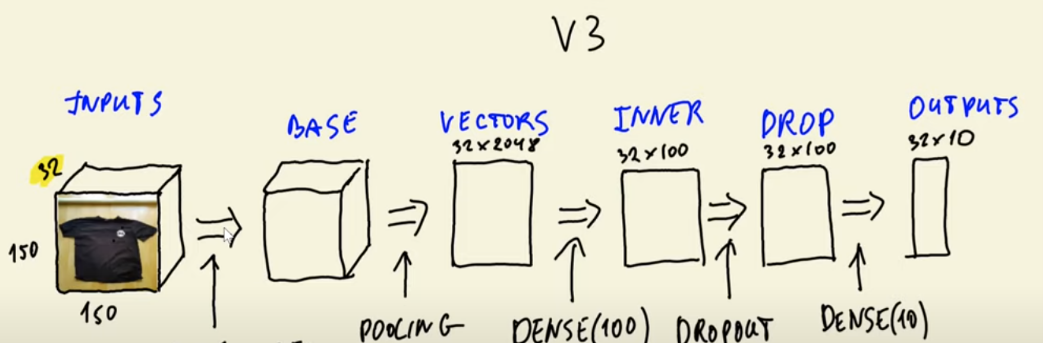

In [ ]:
learning_rate = 0.001
size = 100
scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[lr] = history.history

# 8.10 Data augmentation
Different data augmentations  
Training a model with augmentations  
How to select data augmentations?  

In [ ]:
# Create more data from the existing data
# Possible image transformations
# flip (horiontally, vertically)
# rotation
# shift, width-shift
# shear
# zoom
# brightness/ contrast
# black patch
# All these transformations can be combined
# In keras this can be done in the ImageDataGenerator
# Augmentation is only applied to the training dataset, not to the validation set

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# 8.11 Training a larger model
train on images 299x299

In [ ]:
def make_model(input_size=150,
               learning_rate=.1,
               size_inner=100,
               droprate=0.5):
    base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(input_size, input_size, 3))

    base_model.trainable = False

    ##############################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
train_gen = ImageDataGenerator(
                preprocessing_function=preprocess_input,
                shear_range=10.0,
                zoom_range=0.1,
                vertical_flip=True
                )

# read images from directory
train_ds = train_gen.flow_from_directory('../data/clothing-dataset-small/train',
                                         target_size=(299, 299),
                                         batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# read images from directory
val_ds = val_gen.flow_from_directory('../data/clothing-dataset-small/validation',
                                         target_size=(299, 299),
                                         batch_size=32)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
                    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
                    save_best_only=True,
                    monitor='val_accuracy',
                    mode='max')

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2
input_size = 299

model = make_model(
        input_size=input_size,
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate)

history = model.fit(train_ds,
                    epochs=5,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

# 8.12 Using the model
Loading the model  
Evaluating the model  
Getting predictions  
Pretend the model has been trained and we now start a new Notebook

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

In [ ]:
model = keras.models.load_model('xception_v4_05_0.850.h5')

In [ ]:
# read test dataset in the same way as validation dataset
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# read images from directory
test_ds = test_gen.flow_from_directory('../data/clothing-dataset-small/validation',
                                         target_size=(299, 299),
                                         batch_size=32,
                                         shuffle=False)

In [ ]:
# gives loss and accuracy on test set
model.evaluate(test_ds)

In [ ]:
# apply the model to an image
path = '../data/clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [ ]:
img = load_img(path, target_size=(299,299))
img

In [ ]:
# turn image into a numpy array
x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X

In [ ]:
pred[0]

In [ ]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [ ]:
dict(zip(classes, pred[0]))

In [ ]:
# The predictions here are not propabilities, but logits
# could be transformed into propabilities (using softmax),
# but can also be treated as relative likelihoods. I.e. the largest number is the predicted class

# 8.13 Summary
We can use pre-trained models for general image classification  
Convolutional layers let us turn an image into a vector  
Dense layers use the vector to make the predictions  
Instead of training a model from scratch, we can use transfer   learning and re-use already trained convolutional layers  
First, train a small model (150x150) before training a big one   (299x299)  
Learning rate - how fast the model trians. Fast learners aren't always best ones  
We can save the best model using callbacks and checkpointing  
To avoid overfitting, use dropout and augmentation  